**In this notebook I try to do an Exploratory Data Analysis of a dataset which has data about attributes of songs liked by a user. This data can be used to make a model that would predict whether or not a user would like a song**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
df = df.drop(['Unnamed: 0' , 'song_title' , 'artist'] , axis = 1)

Making a visualization of null values.

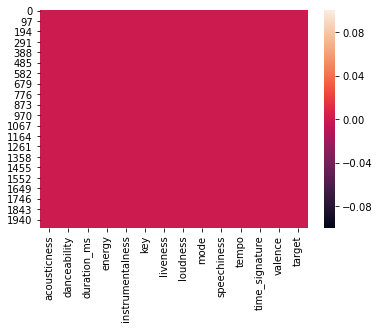

In [5]:
sns.heatmap(df.isnull())

No missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
dtypes: float64(10), int64(4)
memory usage: 220.7 KB


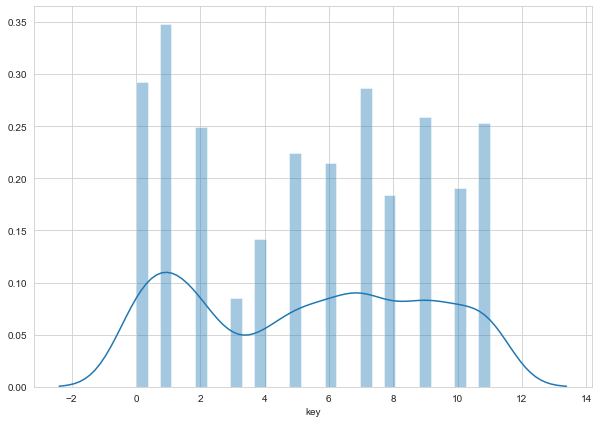

In [7]:
plt.figure(figsize =(10,7))
sns.set_style('whitegrid')
sns.distplot(df['key'] , bins = 30)

You'd expect that speechiness and instrumentalness would be inverse. So if we plot them, it should show that a song which is more instrummental is less speechy and vice-versa.

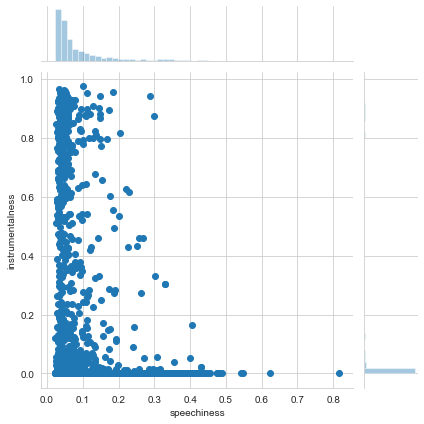

In [8]:
sns.jointplot(x = 'speechiness' , y = 'instrumentalness' , data = df , kind = 'scatter')

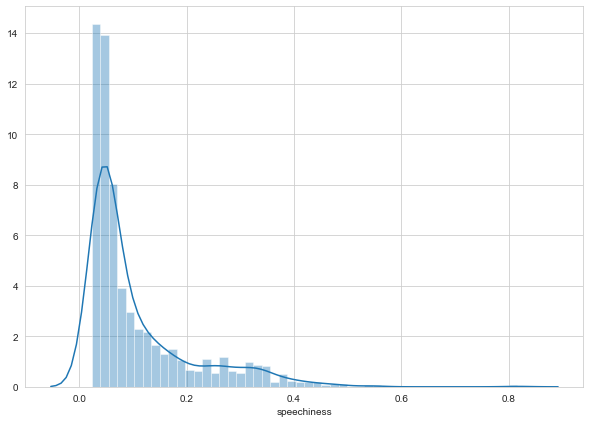

In [9]:
plt.figure(figsize = (10,7))
sns.set_style('whitegrid')
sns.distplot(df['speechiness'][df['target'] == 1], bins = 50)

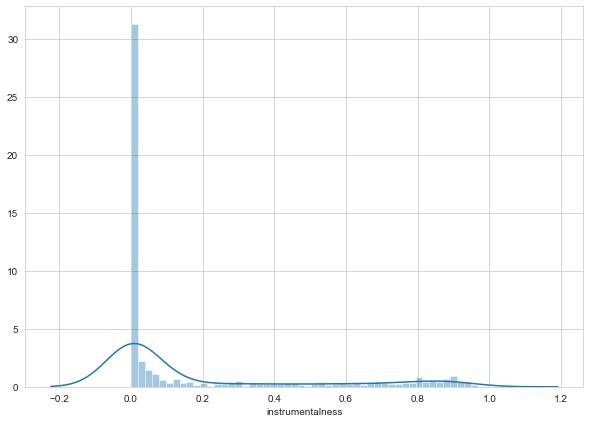

In [10]:
plt.figure(figsize = (10,7))
sns.set_style('whitegrid')
sns.distplot(df['instrumentalness'][df['target'] == 1], bins = 50)

So it seems like the user non instrumental songs more.

In [11]:
df['speechiness'].describe()

count    2017.000000
mean        0.092664
std         0.089931
min         0.023100
25%         0.037500
50%         0.054900
75%         0.108000
max         0.816000
Name: speechiness, dtype: float64

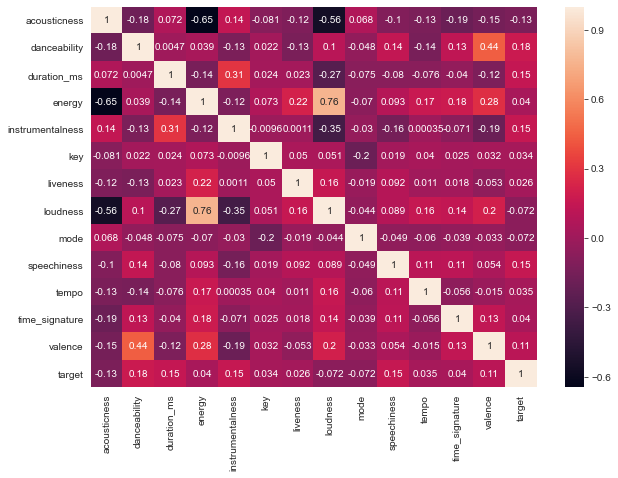

In [12]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)

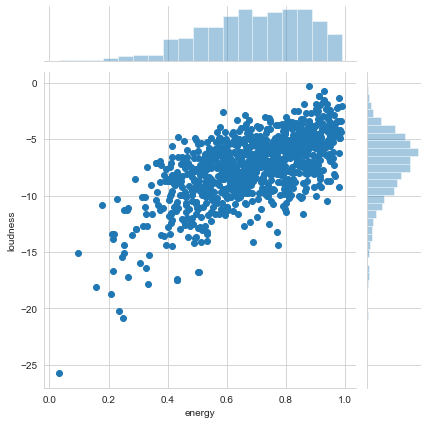

In [13]:
sns.jointplot(x = 'energy', y = 'loudness', data = df[df['target'] == 1])

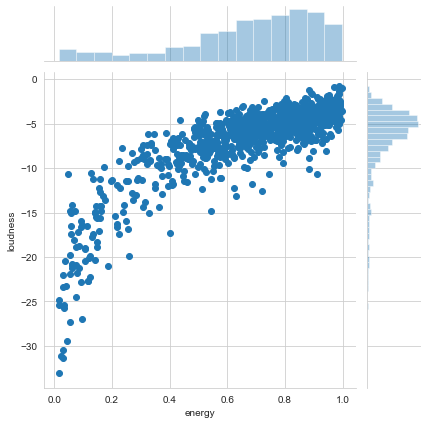

In [14]:
sns.jointplot(x = 'energy', y = 'loudness', data = df[df['target'] == 0])

Since Loudness and Energy are highly correlated, we can drop one of them. 

In [15]:
df = df.drop('loudness' , axis = 1)

In [16]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,0,0.0694,174.004,4.0,0.904,1


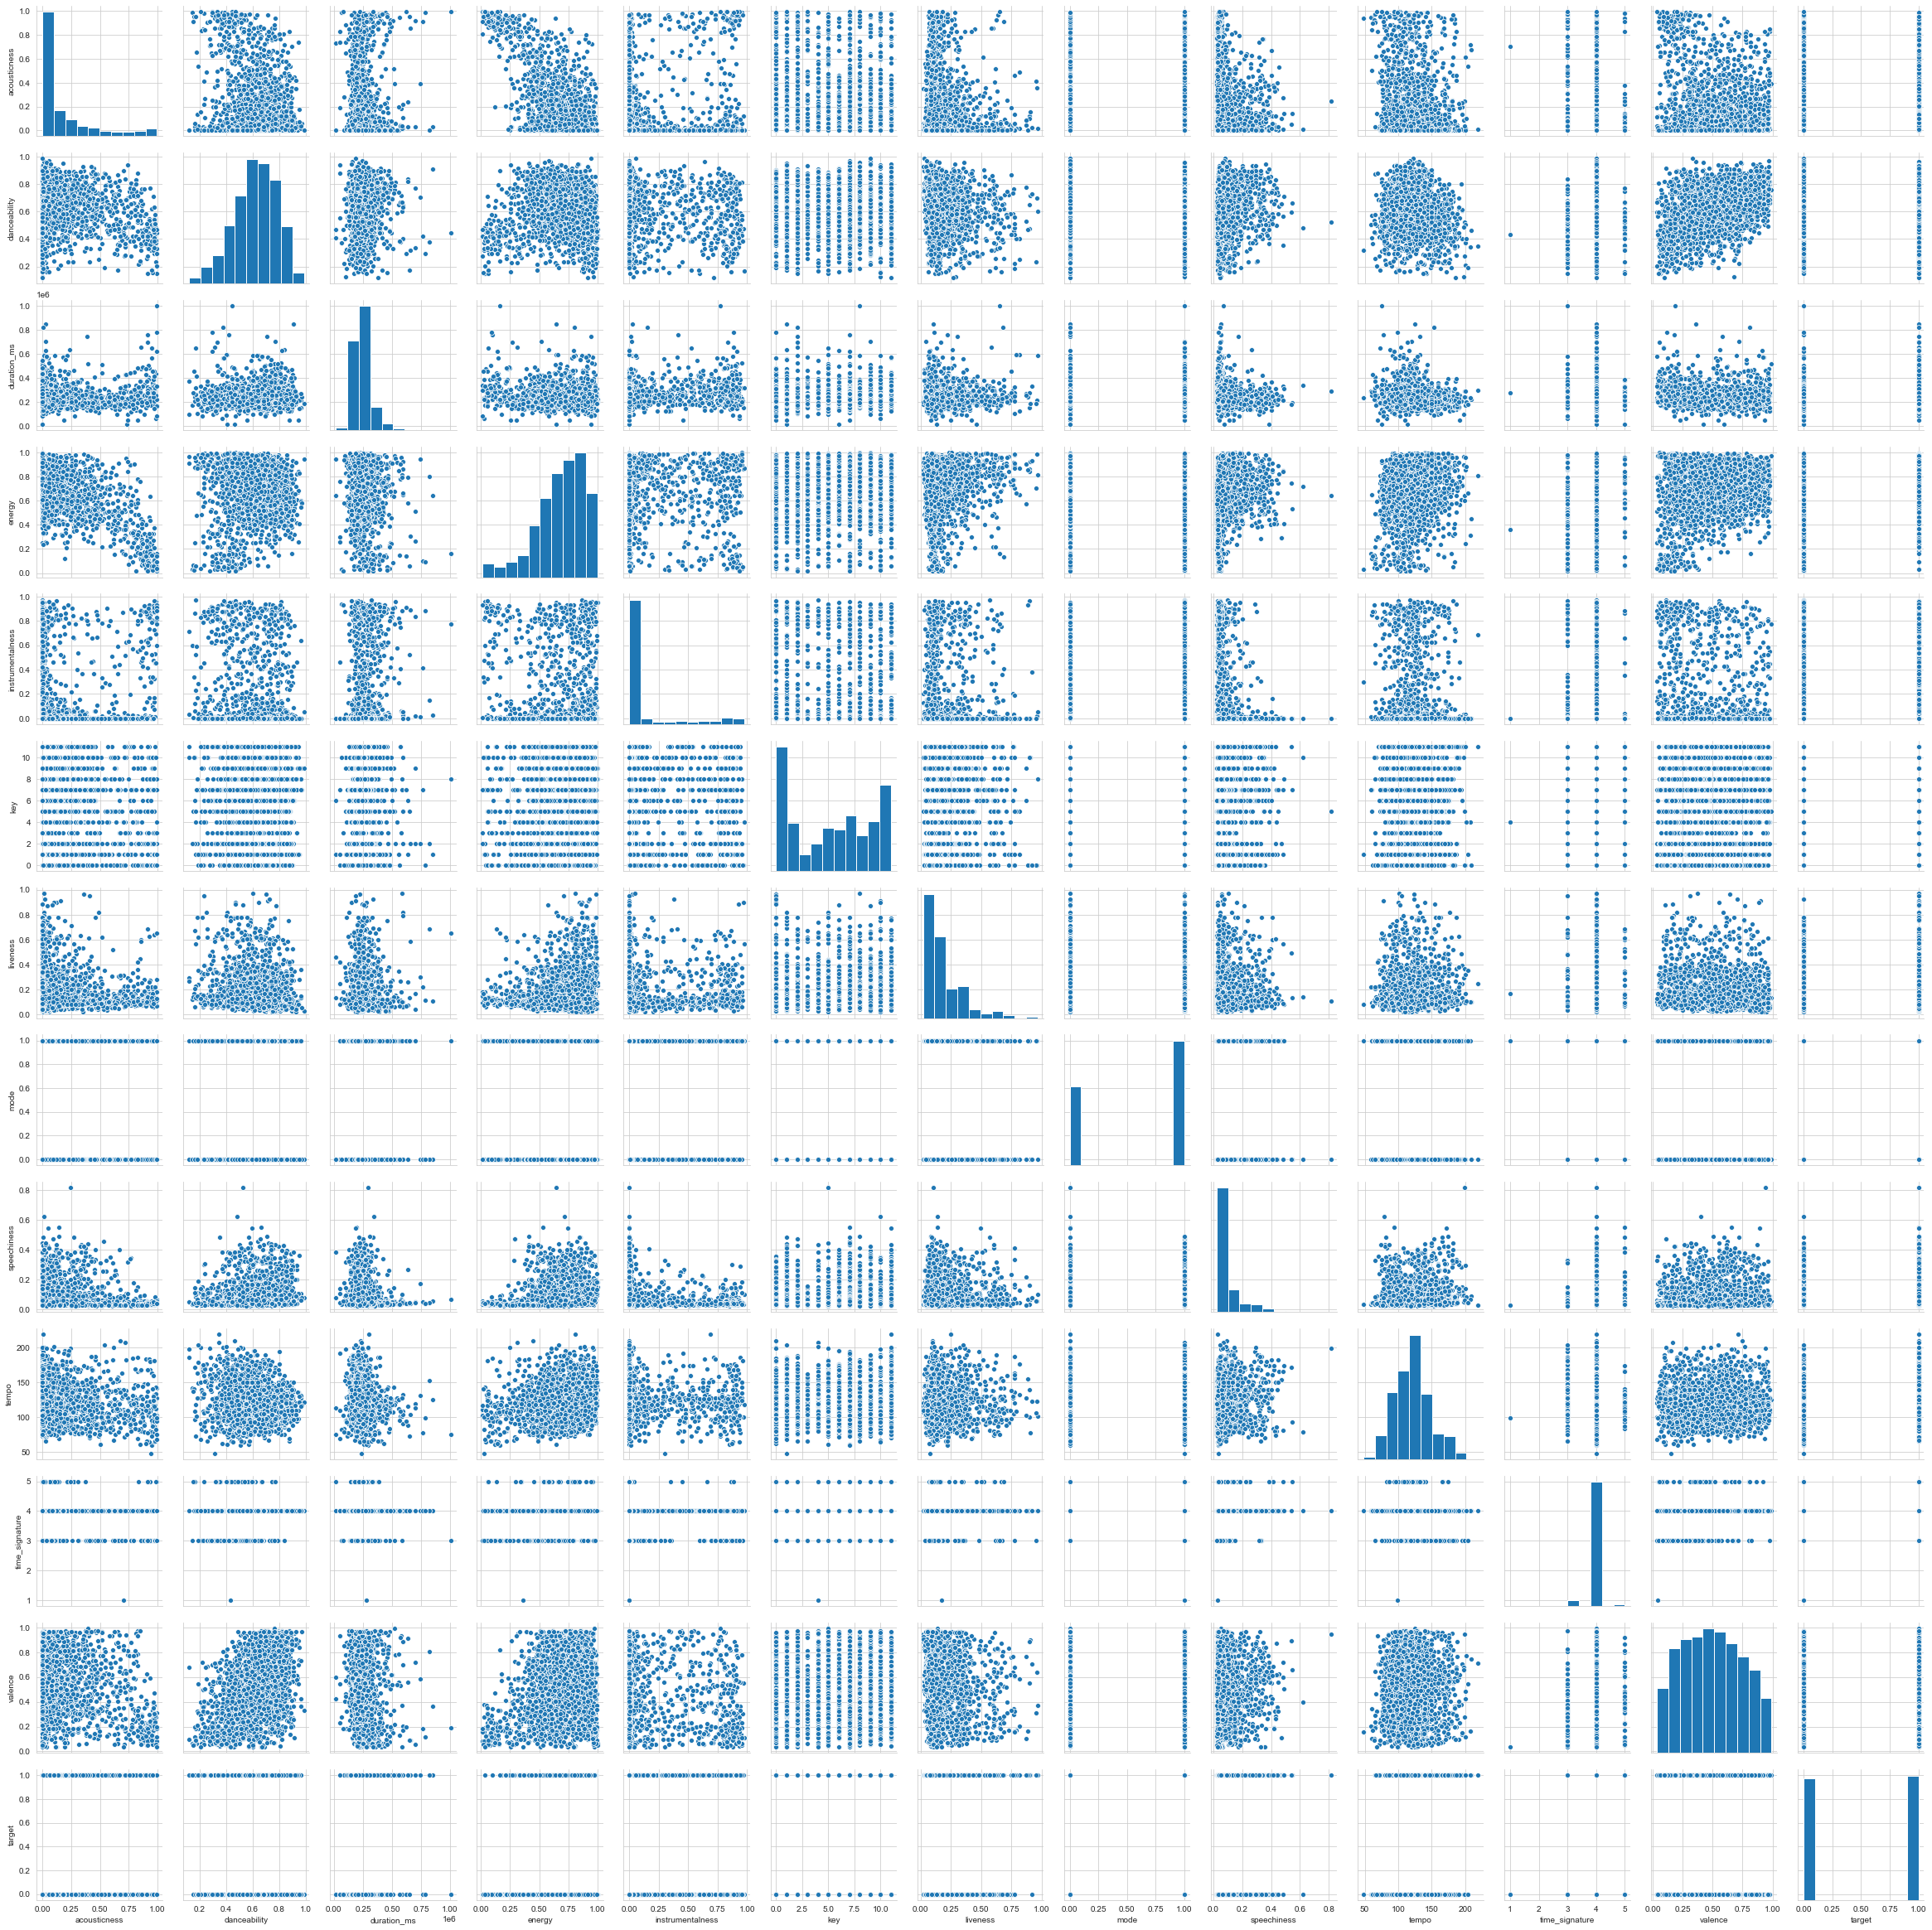

In [25]:
sns.pairplot(df)

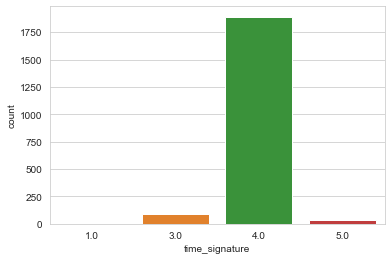

In [18]:
sns.countplot(x = df['time_signature'])

Since most of the values of this columns are same, we can remove this as well.

In [19]:
df = df.drop('time_signature' , axis = 1)

In [21]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,1,0.4310,150.062,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,1,0.0794,160.083,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,1,0.2890,75.044,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,1,0.0261,86.468,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,0,0.0694,174.004,0.904,1


In [22]:
df.shape

(2017, 12)

In [23]:
df.to_csv('data_1.csv')